# Project Title: Predictive Health Insurance Model for AGI Insurance
Client: AGI Insurance

Service Provider: Apex technology AI

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_excel('premiums.xlsx')
df.shape

(50000, 13)

In [27]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


(None,
 Age                       0
 Gender                    0
 Region                    0
 Marital_status            0
 Number Of Dependants      0
 BMI_Category              0
 Smoking_Status           11
 Employment_Status         2
 Income_Level             13
 Income_Lakhs              0
 Medical History           0
 Insurance_Plan            0
 Annual_Premium_Amount     0
 dtype: int64)

In [28]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [29]:
cat_col = ["Smoking_Status", "Employment_Status","Income_Level"]

for i in cat_col:
  df[i] = df[i].fillna(df[i].mode()[0])

In [30]:
df.isnull().sum().sum()

np.int64(0)

In [31]:
display(df.describe())

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


In [32]:
for i in df.columns:
    print(f"{df[i]} :-- {df[i].unique()}")

0        26
1        29
2        49
3        30
4        18
         ..
49995    24
49996    47
49997    21
49998    18
49999    48
Name: Age, Length: 50000, dtype: int64 :-- [ 26  29  49  30  18  56  33  43  59  22  21  46  68  60  27  25  36  20
  28  32  19  55  35  52  40  23  50  41  67  37  24  34  54  42  45  44
  57  38  31  58  48  51 224  47  39  53  66  64  65  62  61  70  72  69
  71 124  63 136 203 356]
0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
49995    Female
49996    Female
49997      Male
49998      Male
49999    Female
Name: Gender, Length: 50000, dtype: object :-- ['Male' 'Female']
0        Northwest
1        Southeast
2        Northeast
3        Southeast
4        Northeast
           ...    
49995    Northwest
49996    Southeast
49997    Northwest
49998    Northwest
49999    Southwest
Name: Region, Length: 50000, dtype: object :-- ['Northwest' 'Southeast' 'Northeast' 'Southwest']
0        Unmarried
1          Mar

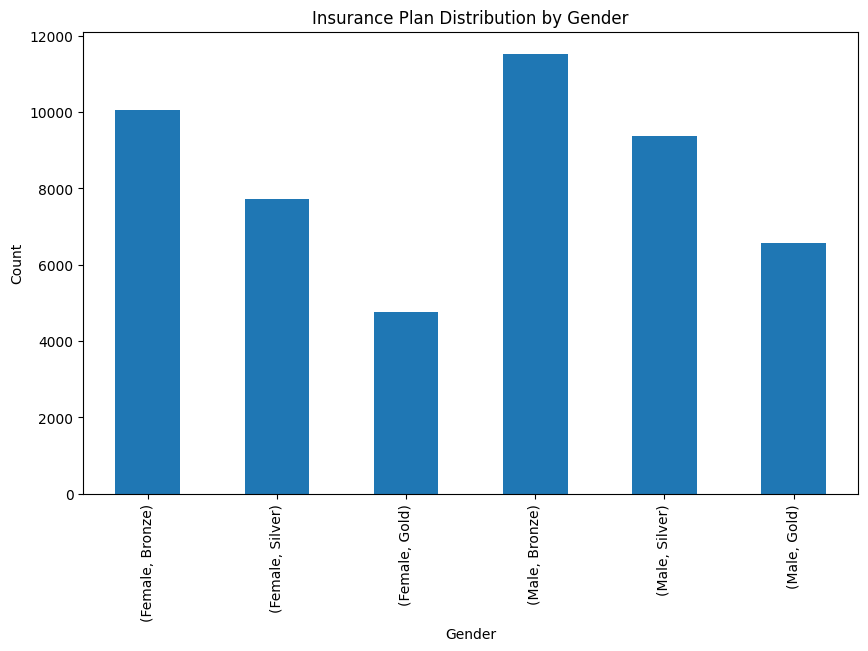

In [33]:
insurance_plan_counts = df.groupby('Gender')['Insurance_Plan'].value_counts()
insurance_plan_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Insurance Plan Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

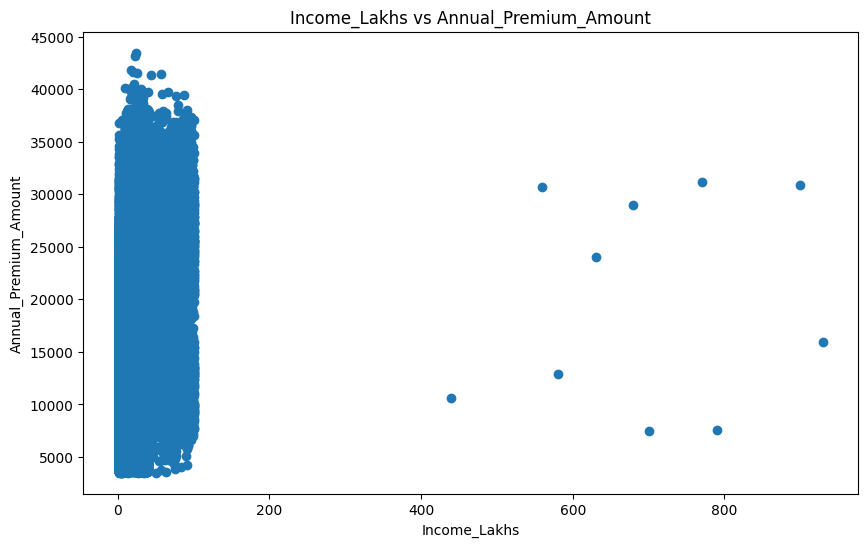

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income_Lakhs'], df['Annual_Premium_Amount'])
plt.title('Income_Lakhs vs Annual_Premium_Amount')
plt.xlabel('Income_Lakhs')
plt.ylabel('Annual_Premium_Amount')
plt.show()

In [35]:
# select category columns
cat_cols = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('Annual_Premium_Amount', axis=1)
y = df['Annual_Premium_Amount']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [40]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train_poly_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred_lr = lr_model.predict(X_test_poly_scaled)

In [44]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

Linear Regression - Mean Squared Error: 5871904.533125449
Linear Regression - R-squared: 0.9171856260941205


In [45]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [46]:
y_pred_dt = dt_model.predict(X_test)

In [47]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor - R-squared: {r2_dt}")

Decision Tree Regressor - Mean Squared Error: 2640784.740373222
Decision Tree Regressor - R-squared: 0.962755706660339


In [48]:
import pickle

pickle.dump(dt_model, open('decision_tree_model.pkl', 'wb'))